Simple thresholding

In [67]:

from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import statistics
import time
import scipy
import cv2


255
0


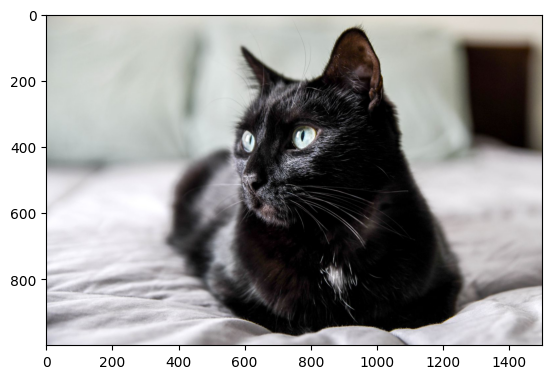

In [68]:
#loading test image
image_name="cat.jpg"
I=plt.imread(image_name)
imgplot = plt.imshow(I)
imgplotgrey = plt.imshow(I,cmap='gray') #grayscale

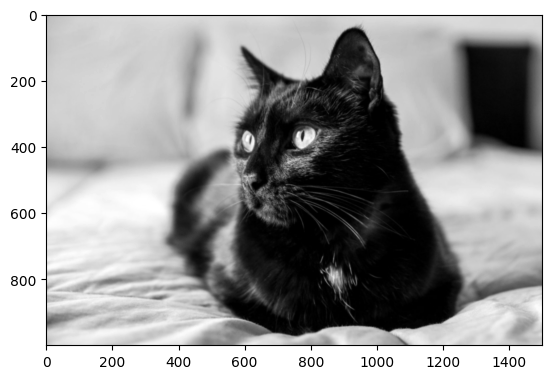

In [69]:
gray_image = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)                    #converting image to grayscale image
blurred_image = cv2.GaussianBlur(gray_image,(5,5),1)                #adding gaussian blur

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

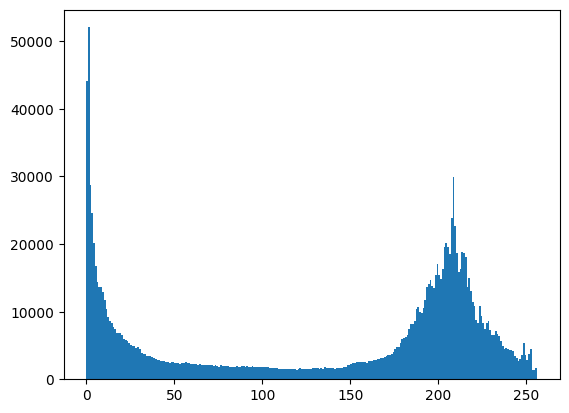

In [70]:

plt.hist(blurred_image.ravel(),256,[0,256])             #plotting the histogram for the blured image
plt.savefig(image_name.split('.')[0]+'.png')
plt.show()


In [71]:
threshold=[]
for i in range(0,3):
    t =int(input("Enter suitable Threshold value "+str(i)+": "))                    #Getting thr threshold values from the user
    threshold.append(t)
i=0
for x in threshold:
    
    binary_mask = blurred_image < x                                                  #Replace image pixels into white in those regions, where saturation is greater than x and into the black in the opposite cases.
    fig, ax = plt.subplots()
    plt.title("Threshold =" + str(x))
    plt.imshow(binary_mask, cmap="gray")
    plt.savefig(image_name.split('.')[0]+str(i)+'.png')
    i+=1

OTSU THRESHOLDING

In [72]:


hist, _ = np.histogram(I, bins=256, range=(0, 255))

hist = 1.0 * hist/np.sum(hist)      # Normalization of histogram values so that finding averages and variance is easier

val_max = -999
threshold = 0
for t in range(1,255):
    q1 = np.sum(hist[:t])                                                                   #class 1 probability
    q2 = 1-q1                                                                               #class 2 probability 
    #q1 and q2 should sum up to 1
    
    m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1                                #mean intensity of class 1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2                            #mean intensity of class 2
    val = q1*q2*np.power(m1-m2,2)                                                           #between-class variance
    if val_max < val:
        val_max = val
        threshold = t
print(threshold)

115


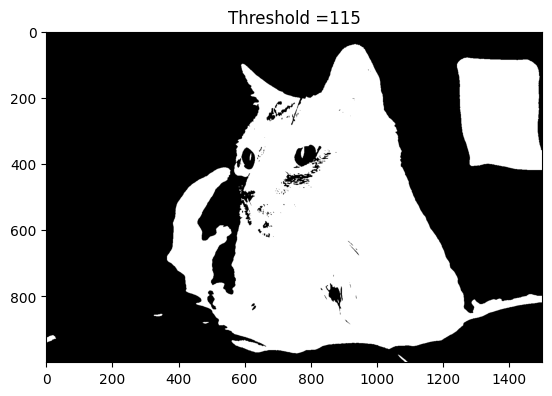

In [73]:
x=threshold
binary_mask = blurred_image < x                                                  #Replace image pixels into white in those regions, where saturation is greater than x and into the black in the opposite cases.
fig, ax = plt.subplots()
plt.title("Threshold =" + str(x))
plt.imshow(binary_mask, cmap="gray")
plt.savefig(image_name.split('.')[0]+str(i)+'_otsu.png')